In [1]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from keras.datasets import mnist # only used to import dataset
sns.set_theme()

In [12]:
from cnn import Sequential 
from cnn.layers import Linear, ReLU, Softmax, Flatten
from cnn.loss import CrossEntropyLoss
from cnn.optim import Adam
from cnn.utils import train_val_test_split, train_val, plot_train_val, test

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
X = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

X.shape, y.shape


((70000, 28, 28), (70000,))

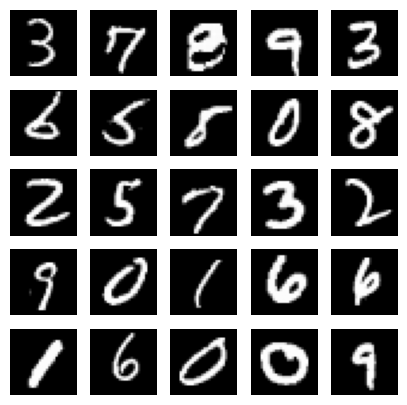

In [4]:
r = 5 
indexes = np.random.randint(0, x_train.shape[0], size=r ** 2)
images = X[indexes]
labels = y_train[indexes]

plt.figure(figsize=(r,r))
for i in range(len(indexes)):
    plt.subplot(r, r, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.close('all')

In [5]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y)

In [6]:
X_train.shape, X_val.shape, X_test.shape

((49000, 28, 28), (10500, 28, 28), (10500, 28, 28))

In [7]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_val= X_val.reshape(X_val.shape[0], -1)

In [8]:
X_train.shape, X_val.shape

((49000, 784), (10500, 784))

In [9]:
y_train.shape

(49000,)

In [ ]:
ordered_layers = [
      #Flatten(),
      Linear(784, 10),
      # ReLU(),
      # Linear(32, 16),
      # ReLU(),
      # Linear(16, 10),
      Softmax()
    ]

loss = CrossEntropyLoss()
optim = Adam()
model = Sequential(
  layers=ordered_layers,
  loss_func = loss,
  optimizer = optim
  )

EPOCHS = 100
batch_size = 32
train_losses, train_accuracies, val_losses, val_accuracies = train_val(model, X_train, y_train, X_val, y_val, epochs=EPOCHS, verbose_freq = 1)

Epoch 1, Train Loss: 13.150171, Train Accuracy: 0.184020, Val Loss: 13.001789, Val Accuracy: 0.193238
Epoch 2, Train Loss: 13.006624, Train Accuracy: 0.192980, Val Loss: 13.006555, Val Accuracy: 0.193048
Epoch 3, Train Loss: 12.992510, Train Accuracy: 0.193918, Val Loss: 12.968159, Val Accuracy: 0.195429
Epoch 4, Train Loss: 12.972214, Train Accuracy: 0.195122, Val Loss: 12.952299, Val Accuracy: 0.196381
Epoch 5, Train Loss: 12.947553, Train Accuracy: 0.196653, Val Loss: 13.009436, Val Accuracy: 0.192762
Epoch 6, Train Loss: 12.946787, Train Accuracy: 0.196714, Val Loss: 12.915967, Val Accuracy: 0.198667
Epoch 7, Train Loss: 12.933365, Train Accuracy: 0.197571, Val Loss: 12.915967, Val Accuracy: 0.198667
Epoch 8, Train Loss: 12.933815, Train Accuracy: 0.197531, Val Loss: 12.914207, Val Accuracy: 0.198762
Epoch 9, Train Loss: 12.927724, Train Accuracy: 0.197918, Val Loss: 12.912196, Val Accuracy: 0.198857
Epoch 10, Train Loss: 12.927783, Train Accuracy: 0.197918, Val Loss: 12.910575, Va

KeyboardInterrupt: 